# Relation between graph spectrum and Integration/Segregation measures

### Integration :
- average shortest path length
- global efficiency

### Segregation :
- clustering coefficient 
- local efficiency

### Centrality :
- closeness centrality
- betweenness centrality

In [1]:
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np
from multiprocessing import Pool
from gsp_neuro import utils as ut

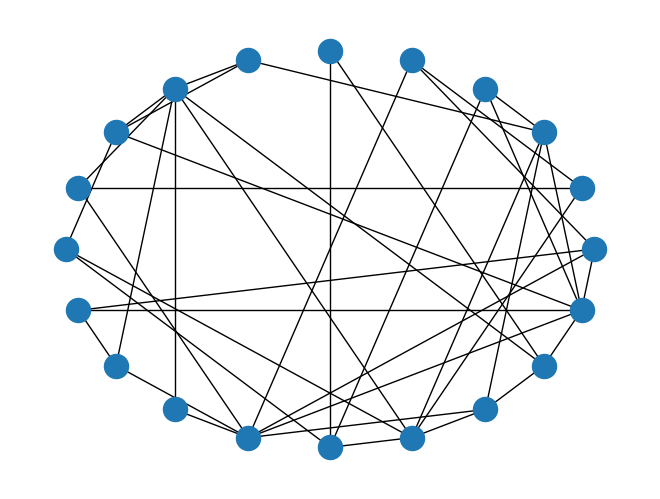

In [29]:
G=nx.watts_strogatz_graph(n=20, k=4, p=0.7)
nx.draw_circular(G)

In [10]:
ps = np.arange(.7, step=.05)

In [11]:
spectrums =[]
metrics = []

with Pool() as pool:
    for spectr, metrs in pool.map(ut.compute_stuff, ps):
        spectrums.append(spectr)
        metrics.append(metrs)
spectrums = np.stack(spectrums, axis=0)
metrics = np.stack(metrics, axis=0)

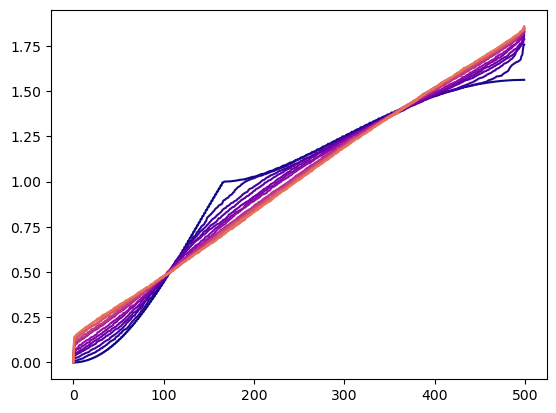

In [12]:
for p, spect in zip(ps, spectrums):
    plt.plot(spect, color=plt.cm.plasma(p))
plt.show()

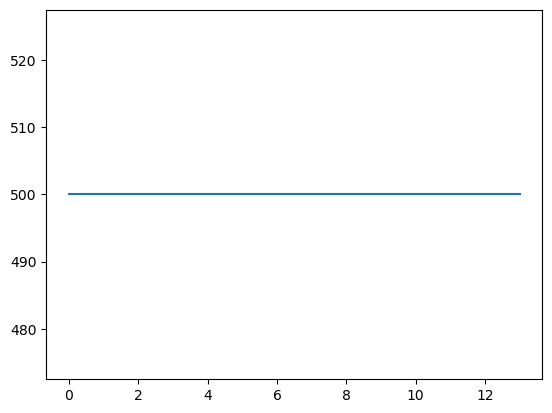

In [24]:
plt.plot(np.sum(spectrums,axis=1))

(array([ 57.,  26.,  20.,  20.,  18.,  18.,  77.,  62.,  68., 134.]),
 array([0.        , 0.15624983, 0.31249966, 0.46874949, 0.62499931,
        0.78124914, 0.93749897, 1.0937488 , 1.24999863, 1.40624846,
        1.56249828]),
 <BarContainer object of 10 artists>)

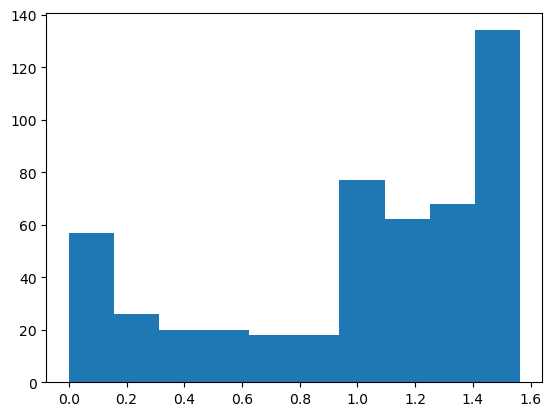

In [19]:
plt.hist(spectrums[0])

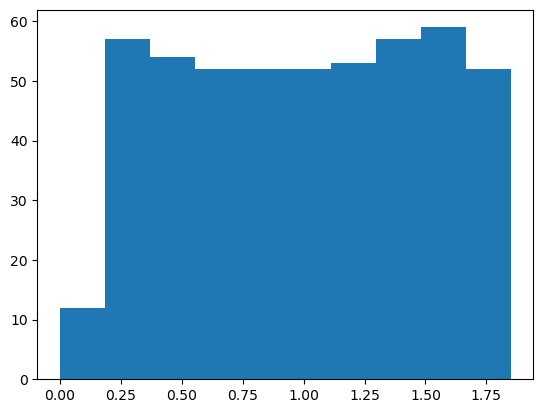

In [21]:
plt.hist(spectrums[-1]);

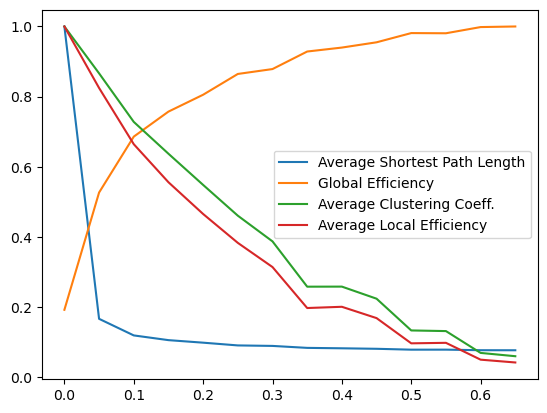

In [13]:
plt.plot(ps, metrics[:,0]/metrics[:,0].max())
plt.plot(ps, metrics[:,1]/metrics[:,1].max())
plt.plot(ps, metrics[:,2]/metrics[:,2].max())
plt.plot(ps, metrics[:,3]/metrics[:,3].max())
plt.legend(['Average Shortest Path Length', 'Global Efficiency', 'Average Clustering Coeff.', 'Average Local Efficiency'])


In [14]:
def energy_concentration_idx(spectrum):
    N = spectrum.shape[0]
    return np.sum(spectrum[:int(N//2)])/np.sum(spectrum)

In [15]:
energy_idx = [energy_concentration_idx(spect) for spect in spectrums]

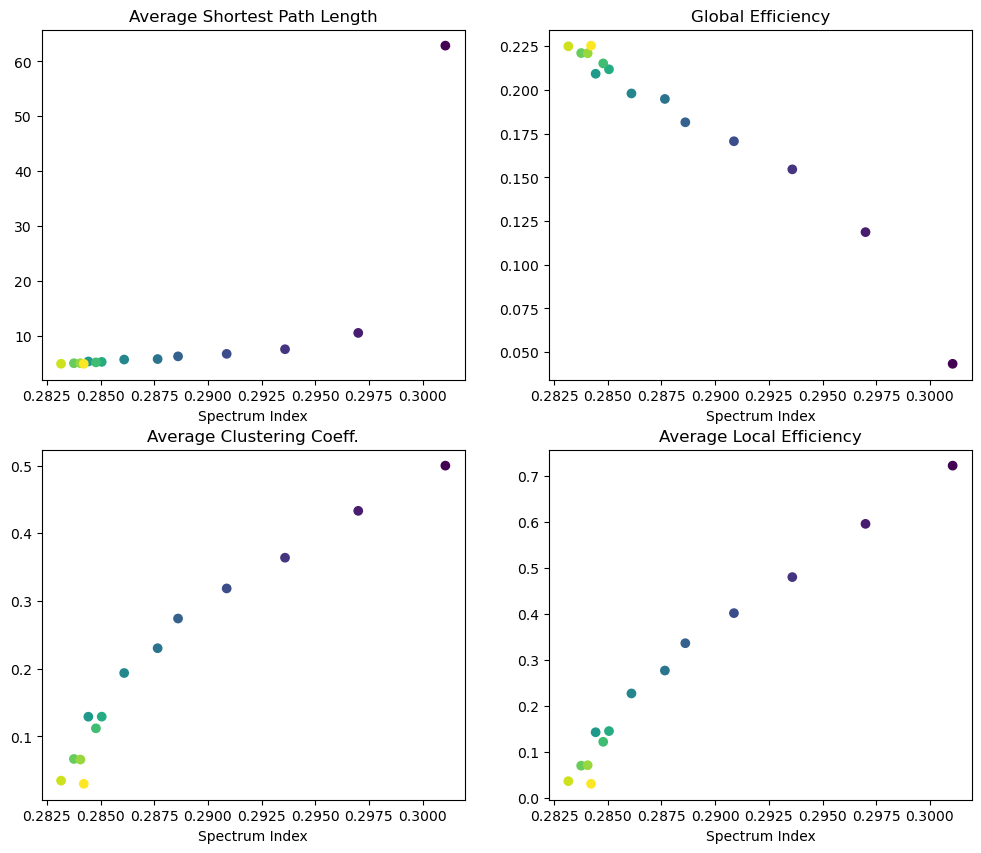

In [16]:
fig, axs = plt.subplots(2,2,figsize=(12,10))
[axs.flat[i].scatter(energy_idx, metrics[:,i], c=ps) for i in range(4)]
[axs.flat[i].set_title(t) for i,t in zip(range(4),['Average Shortest Path Length', 'Global Efficiency', 'Average Clustering Coeff.', 'Average Local Efficiency'])]
[axs.flat[i].set_xlabel('Spectrum Index') for i in range(4)]
plt.show()

/var/folders/zw/s9jkbctn3193dlc4s0nyk3440000gn/T/ipykernel_60174/3649830363.py:1: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(ps), energy_idx)


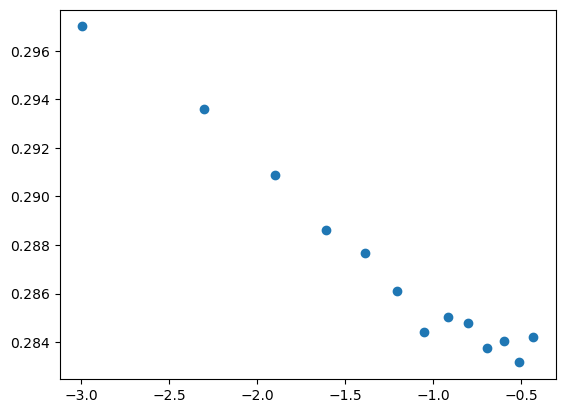

In [28]:
plt.scatter(np.log(ps), energy_idx)

In [ ]:
plt.scatter()